In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='Batang')
PATH = f"사용자수_2021년 1월-10월.csv"
df = pd.read_csv(PATH, parse_dates=['date_id'])
df

,date_id,활성사용자수,활성사용자수(웰컴 및 Event 수신제외),신규사용자수,재방문사용자수,누적사용자수
0,2021-01-01,1,1,0,1,1331
1,2021-01-02,1,1,0,1,1331
2,2021-01-03,4,4,1,3,1332
3,2021-01-04,49,49,0,49,1332
4,2021-01-05,54,54,2,52,1334
...,...,...,...,...,...,...
292,2021-10-26,302,302,6,296,2804
293,2021-10-27,264,263,6,258,2810
294,2021-10-28,262,262,4,258,2814
295,2021-10-29,195,195,2,193,2816


In [3]:
import datetime
def get_days(date): # 요일 구하는 함수
    date = list(map(int, date.split('-')))
    days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    return days[datetime.date(date[0], date[1], date[2]).weekday()]

In [4]:
user = df.loc[:, ['date_id','활성사용자수','재방문사용자수']]
user

,date_id,활성사용자수,재방문사용자수
0,2021-01-01,1,1
1,2021-01-02,1,1
2,2021-01-03,4,3
3,2021-01-04,49,49
4,2021-01-05,54,52
...,...,...,...
292,2021-10-26,302,296
293,2021-10-27,264,258
294,2021-10-28,262,258
295,2021-10-29,195,193


In [5]:
user = user.query("date_id.dt.dayofweek < 5")
user

,date_id,활성사용자수,재방문사용자수
0,2021-01-01,1,1
3,2021-01-04,49,49
4,2021-01-05,54,52
5,2021-01-06,63,58
6,2021-01-07,64,59
...,...,...,...
291,2021-10-25,305,299
292,2021-10-26,302,296
293,2021-10-27,264,258
294,2021-10-28,262,258


In [6]:
user_holiday = user[(user['date_id'] == '2021-01-01') | (user['date_id'] == '2021-02-11') | (user['date_id'] == '2021-02-12') |
                    (user['date_id'] == '2021-03-01') | (user['date_id'] == '2021-05-05') | (user['date_id'] == '2021-05-19') |
                    (user['date_id'] == '2021-09-20') | (user['date_id'] == '2021-09-21') | (user['date_id'] == '2021-09-22') ].index
users = user.drop(user_holiday)
users

,date_id,활성사용자수,재방문사용자수
3,2021-01-04,49,49
4,2021-01-05,54,52
5,2021-01-06,63,58
6,2021-01-07,64,59
7,2021-01-08,33,32
...,...,...,...
291,2021-10-25,305,299
292,2021-10-26,302,296
293,2021-10-27,264,258
294,2021-10-28,262,258


In [7]:
# 재방문률 확인
revisit = users['재방문사용자수'].sum()/users['활성사용자수'].sum()
print("재방문률 :",revisit*100,"%")

재방문률 : 95.98254919807916 %


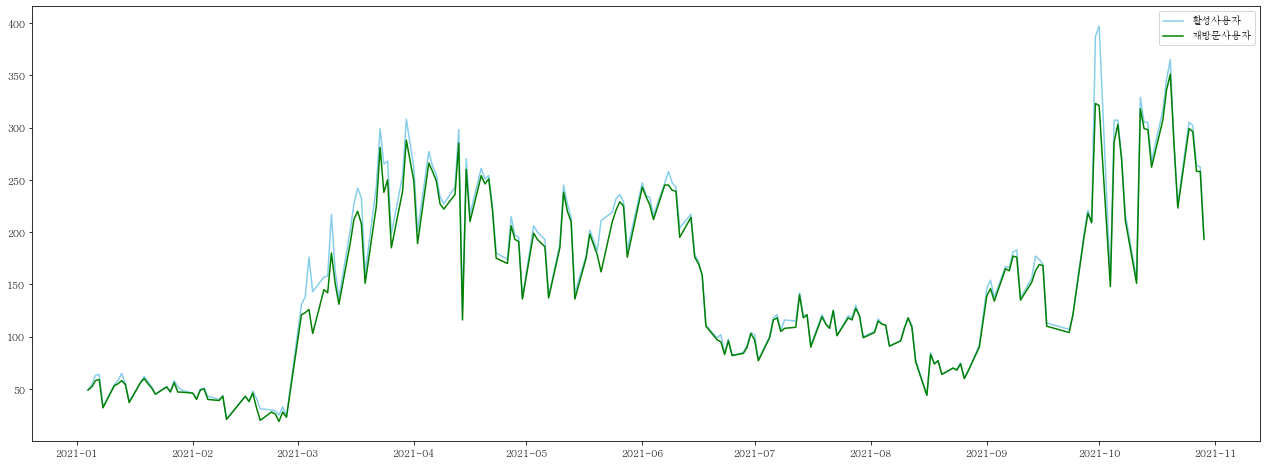

In [9]:
plt.figure(figsize=(22,8))
visit = ['활성사용자', '재방문사용자']
plt.plot(users['date_id'], users['활성사용자수'], color='skyblue')
plt.plot(users['date_id'], users['재방문사용자수'], color='green')
plt.legend(visit)